# Bike Sharing Assignment

## Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals. A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
So company decide to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

*Which variables are significant in predicting the demand for shared bikes.
*How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:

- We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

To Predict the cnt (Y_Pred)

## Importing required libraries and warnings

In [117]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 16, 'display.max_columns', 16)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

## Reading and understanding data

In [119]:
data=pd.read_csv('day.csv')

In [120]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [121]:
data.shape
#holds 730 records with 16 variables

(730, 16)

In [122]:
data.info()
#no null values and data type found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<AxesSubplot:>

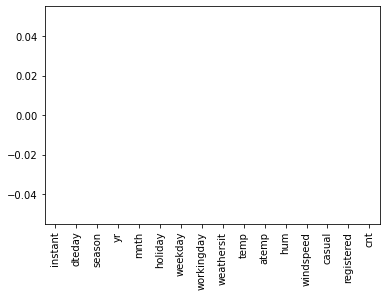

In [123]:
((data.isna().sum()/data.shape[0])*100).plot(kind='bar')
#bar plot of null variables.. nothing found

In [124]:
data.describe(include='all')
# check the max,  mean, min of all variables

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.50,NaN,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,"3,658.76","4,508.01"
std,210.88,NaN,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,"1,559.76","1,936.01"
min,1.00,NaN,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,NaN,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,"2,502.25","3,169.75"
50%,365.50,NaN,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,"3,664.50","4,548.50"
75%,547.75,NaN,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,"1,096.50","4,783.25","5,966.00"


## EDA and Visualising the Data
<b> Data Visualization

- 1.0 Perform EDA to understand various variables.
- 2.0 Check the correlation between the variables.
- 3.0 Drop the unneccassary variables


In [125]:
#Drop Unnecessary variables: ex. ‘instant’ , ‘dteday’ , ‘casual’ and ‘registered’ etc
# As we known following these variable doesn't create significant coreleation with cnt_predict so lets drop from analysis
#reason. date, we have weeks & years. causual & registered is not an trusted info and not useful for predict
data.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)


In [126]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600


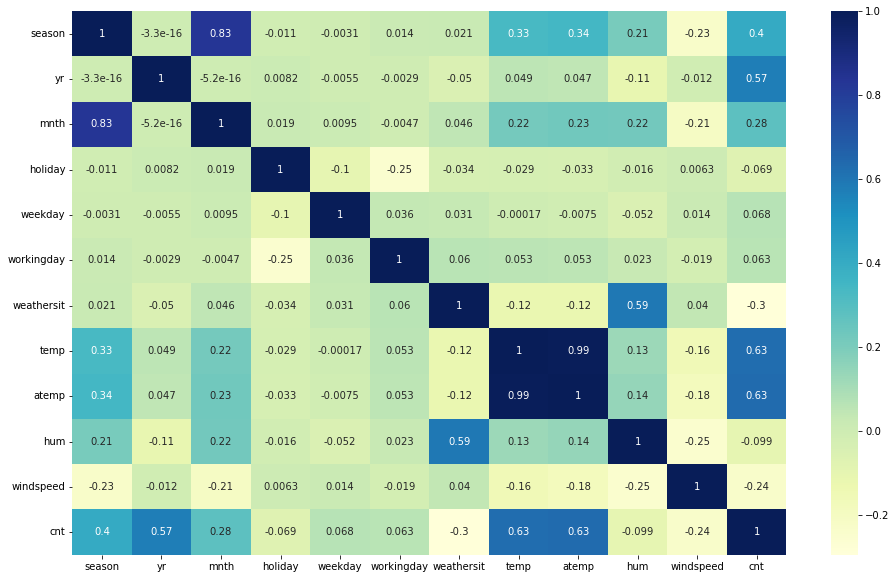

In [127]:
# Let check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


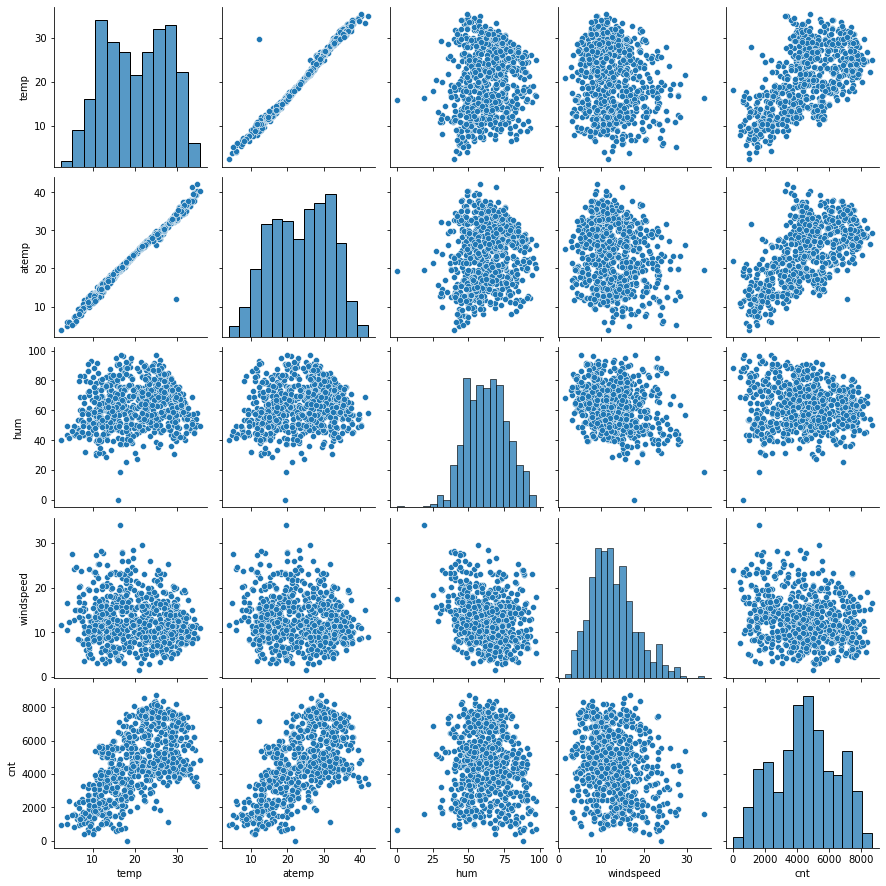

In [129]:
# Pairplot of numerical variables
sns.pairplot(data, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

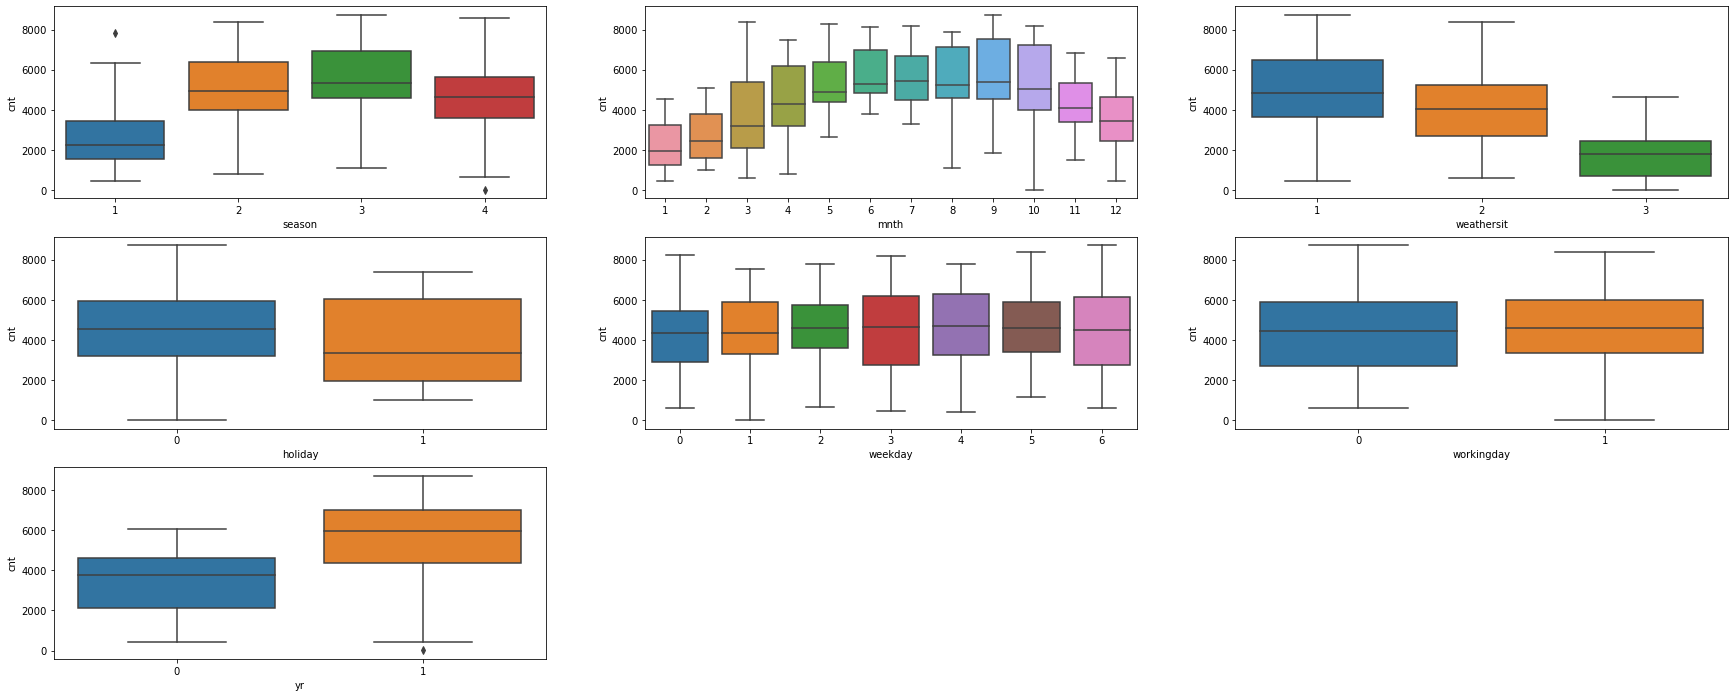

In [130]:
# Boxplot of categorical variables

plt.figure(figsize=(30, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.show()

## Data Preparation
- Create dummy variables for all the categorical features.
- Divide the data to train & Test.
- Perform Scaling.
- Divide data into dependent & Independent variables.


### Dummy Variables
The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [131]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600


In [132]:
data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [133]:
data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [134]:
# Modifying season values as : season (1:spring, 2:summer, 3:fall, 4:winter)

data.season = data.season.apply(lambda x: "Spring" if (x==1) else "Summer" if (x==2) else "Fall" if (x==3) else "Winter")
data.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [135]:
# Modifying weathersit values as : weathersit (1:clear, 2:mist, 3:light, 4:raining)

data.weathersit = data.weathersit.apply(lambda x: "clear" if (x==1) else "mist" if (x==2) else "light" if (x==3) else "raining")
data.weathersit.value_counts()

clear    463
mist     246
light     21
Name: weathersit, dtype: int64

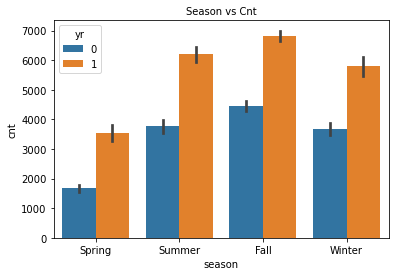

In [136]:
# Bar plot cnt vs season, cnt increased in 2019 compared to 2018
ax = sns.barplot(data=data, x="season", y="cnt", hue="yr")
ax.set_title("Season vs Cnt", fontsize=10)
plt.show()

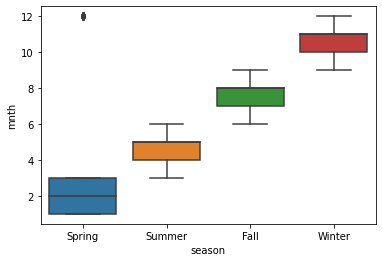

In [137]:
# Bar plot season vs mnth, comparly both are same so we could drop either one. will be dropping off mnth variables
sns.boxplot(x = 'season', y = 'mnth', data = data)
plt.show()

In [138]:
data.drop(['mnth'], axis = 1, inplace = True)

In [139]:
#removing weekday as per box plot in data visulization keeping holiday/workingday for analysis
data.drop(['weekday'], axis = 1, inplace = True)

In [140]:
data.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,0,0,mist,14.11,18.18,80.58,10.75,985
1,Spring,0,0,0,mist,14.90,17.69,69.61,16.65,801
2,Spring,0,0,1,clear,8.05,9.47,43.73,16.64,1349
3,Spring,0,0,1,clear,8.20,10.61,59.04,10.74,1562
4,Spring,0,0,1,clear,9.31,11.46,43.70,12.52,1600


In [141]:
season = pd.get_dummies(data['season'])
season.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, you don't need four columns. You can drop the Fall column, as the type of Fall can be identified with just the last 3 columns where —

- 000 will correspond to Fall
- 100 will correspond to Spring
- 010 will correspond to Summer
- 001 will correspond to Winter

In [142]:
season_dummy = pd.get_dummies(data.season, drop_first=True)
season_dummy.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [143]:
data = pd.concat([data, season_dummy], axis=1)
data.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,0,0,mist,14.11,18.18,80.58,10.75,985,1,0,0
1,Spring,0,0,0,mist,14.90,17.69,69.61,16.65,801,1,0,0
2,Spring,0,0,1,clear,8.05,9.47,43.73,16.64,1349,1,0,0
3,Spring,0,0,1,clear,8.20,10.61,59.04,10.74,1562,1,0,0
4,Spring,0,0,1,clear,9.31,11.46,43.70,12.52,1600,1,0,0


In [144]:
data.drop(['season'], axis = 1, inplace = True)

In [145]:
data.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,0,0,mist,14.11,18.18,80.58,10.75,985,1,0,0
1,0,0,0,mist,14.90,17.69,69.61,16.65,801,1,0,0
2,0,0,1,clear,8.05,9.47,43.73,16.64,1349,1,0,0
3,0,0,1,clear,8.20,10.61,59.04,10.74,1562,1,0,0
4,0,0,1,clear,9.31,11.46,43.70,12.52,1600,1,0,0


In [146]:
weathersit = pd.get_dummies(data['weathersit'])
weathersit.head()

,clear,light,mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [147]:
data.weathersit.value_counts()

clear    463
mist     246
light     21
Name: weathersit, dtype: int64

Now, you don't need 3 columns. You can drop the light column, as the type of light can be identified with just the last 2 columns where —

- 10 will correspond to Clear
- 01 will correspond to mist
- 00 will correspond to light


In [148]:
weathersit_dummy = pd.get_dummies(data['weathersit']).drop('light',axis=1)
weathersit_dummy.head()

,clear,mist
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [149]:
data = pd.concat([data, weathersit_dummy], axis=1)
data.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,clear,mist
0,0,0,0,mist,14.11,18.18,80.58,10.75,985,1,0,0,0,1
1,0,0,0,mist,14.90,17.69,69.61,16.65,801,1,0,0,0,1
2,0,0,1,clear,8.05,9.47,43.73,16.64,1349,1,0,0,1,0
3,0,0,1,clear,8.20,10.61,59.04,10.74,1562,1,0,0,1,0
4,0,0,1,clear,9.31,11.46,43.70,12.52,1600,1,0,0,1,0


In [150]:
data.drop(['weathersit'], axis = 1, inplace = True)


In [151]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,clear,mist
0,0,0,0,14.11,18.18,80.58,10.75,985,1,0,0,0,1
1,0,0,0,14.90,17.69,69.61,16.65,801,1,0,0,0,1
2,0,0,1,8.05,9.47,43.73,16.64,1349,1,0,0,1,0
3,0,0,1,8.20,10.61,59.04,10.74,1562,1,0,0,1,0
4,0,0,1,9.31,11.46,43.70,12.52,1600,1,0,0,1,0


## Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split. 70:30 ratio

In [152]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [153]:
print(data_train.shape)
print(data_test.shape)

(510, 13)
(219, 13)


### Rescaling the Training Features 

1. Min-Max scaling (normalisation btw 0 and 1)
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [154]:
from sklearn.preprocessing import MinMaxScaler

In [155]:
scaler = MinMaxScaler()

In [156]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    int64  
 8   Spring      510 non-null    uint8  
 9   Summer      510 non-null    uint8  
 10  Winter      510 non-null    uint8  
 11  clear       510 non-null    uint8  
 12  mist        510 non-null    uint8  
dtypes: float64(4), int64(4), uint8(5)
memory usage: 38.3 KB


In [157]:
data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,clear,mist
count,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00
mean,0.51,0.03,0.68,20.10,23.49,63.11,12.83,"4,486.38",0.24,0.25,0.25,0.63,0.34
std,0.50,0.16,0.47,7.43,8.09,14.16,5.29,"1,952.16",0.43,0.43,0.43,0.48,0.48
min,0.00,0.00,0.00,2.42,3.95,0.00,2.83,22.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,13.61,16.60,52.27,9.04,"3,120.00",0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,1.00,20.21,24.02,63.44,12.08,"4,530.00",0.00,0.00,0.00,1.00,0.00
75%,1.00,0.00,1.00,26.62,30.18,73.25,15.75,"5,973.50",0.00,0.00,0.00,1.00,1.00
max,1.00,1.00,1.00,35.33,42.04,97.04,34.00,"8,714.00",1.00,1.00,1.00,1.00,1.00


In [158]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp', 'hum', 'temp', 'windspeed', 'cnt']
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

In [159]:
data_train.describe()
#all max is fit to 1

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,clear,mist
count,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00
mean,0.51,0.03,0.68,0.54,0.51,0.65,0.32,0.51,0.24,0.25,0.25,0.63,0.34
std,0.50,0.16,0.47,0.23,0.21,0.15,0.17,0.22,0.43,0.43,0.43,0.48,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.34,0.33,0.54,0.20,0.36,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,1.00,0.54,0.53,0.65,0.30,0.52,0.00,0.00,0.00,1.00,0.00
75%,1.00,0.00,1.00,0.74,0.69,0.75,0.41,0.68,0.00,0.00,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


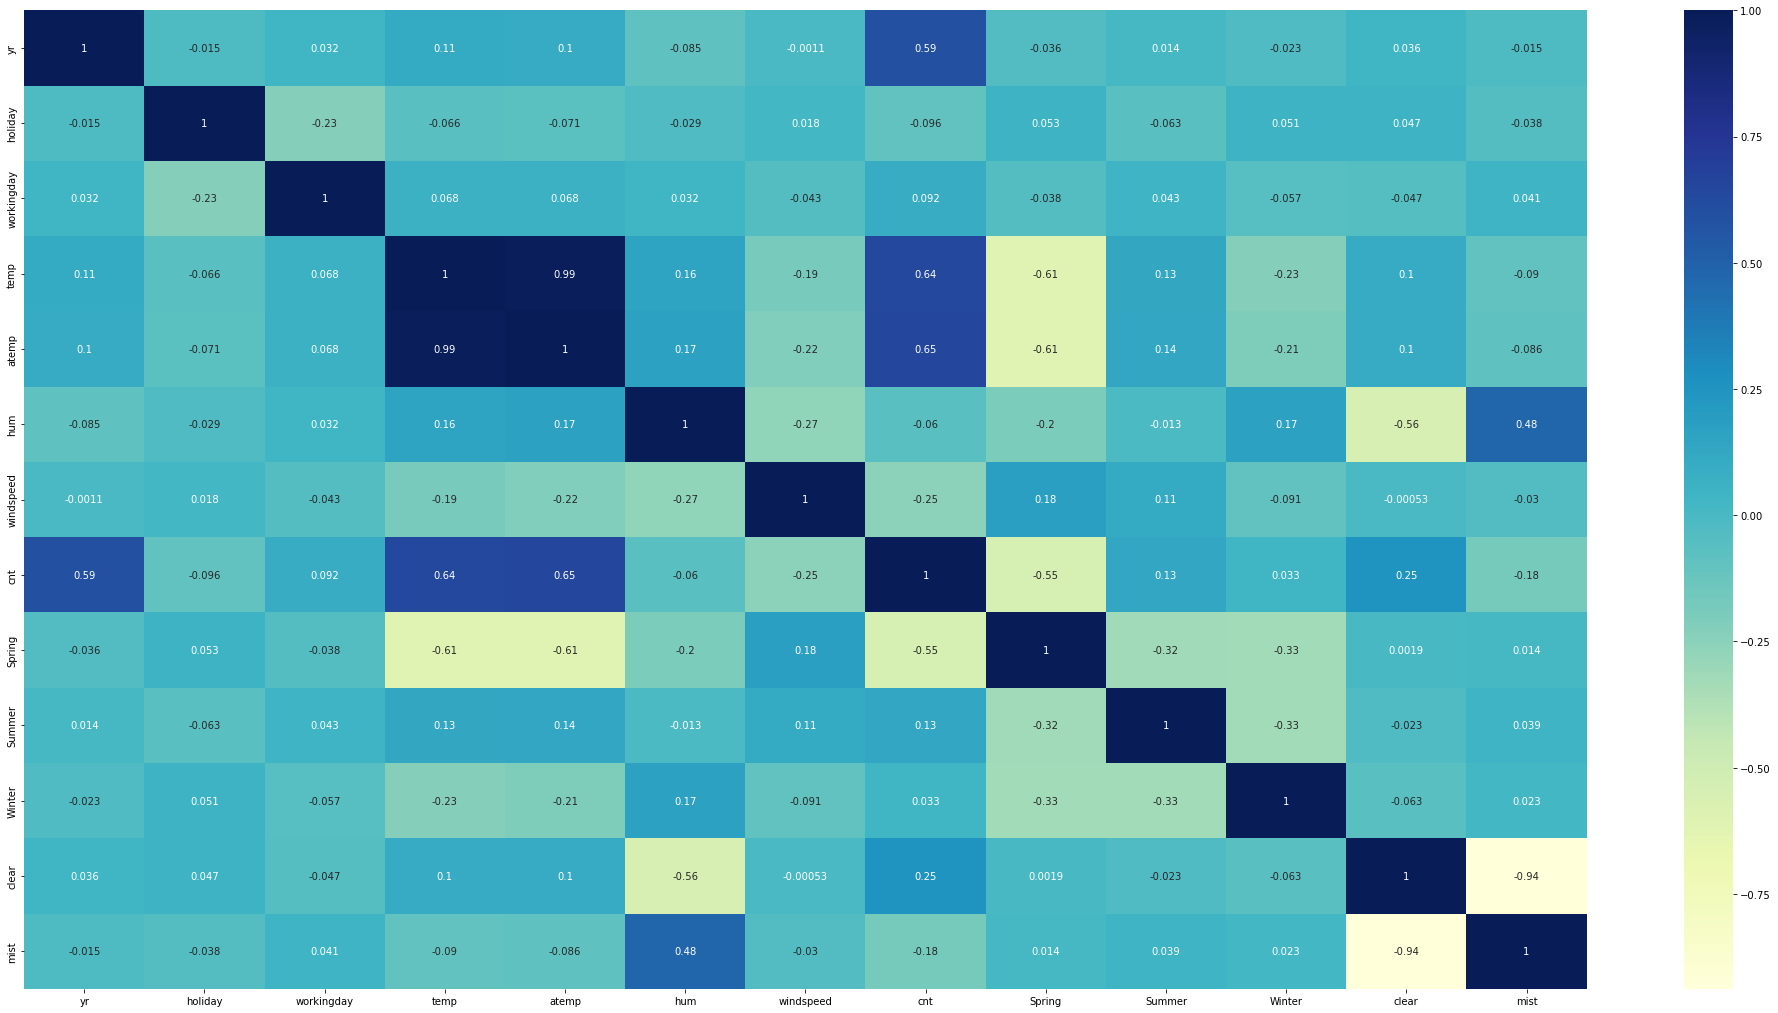

In [160]:
# Let check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (35, 18))
sns.heatmap(data_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [161]:
y_train = data_train.pop('cnt')
X_train = data_train

In [162]:
X_train.shape

(510, 12)

In [163]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,clear,mist
653,1,0,1,0.51,0.50,0.58,0.30,0,0,1,1,0
576,1,0,1,0.82,0.77,0.73,0.26,0,0,0,1,0
426,1,0,0,0.44,0.44,0.64,0.26,1,0,0,0,1
728,1,0,0,0.25,0.20,0.50,0.66,1,0,0,1,0
482,1,0,0,0.40,0.39,0.50,0.19,0,1,0,0,1


## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [164]:
# Using RFE method for variable selection
# Importing RFE and LinearRegression 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [165]:
# Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [166]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('clear', True, 1),
 ('mist', True, 1)]

In [167]:
col = X_train.columns[rfe.support_]
#X_train.columns[~rfe.support_] is not required based on ranking.. all are ranking set by 1
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'clear', 'mist'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

# Model 1

In [168]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [169]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [170]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [171]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.0
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          1.86e-181
Time:                        20:33:51   Log-Likelihood:                 488.03
No. Observations:                 510   AIC:                            -950.1
Df Residuals:                     497   BIC:                            -895.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0381      0.049      0.772      0.4

In [172]:
#p value of atemp & workingday is highest. among them atemp is top. so lets drop for analysis

In [173]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [174]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [175]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [176]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.6
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          1.26e-182
Time:                        20:33:51   Log-Likelihood:                 488.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     498   BIC:                            -901.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0375      0.049      0.761      0.4

In [177]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'clear', 'mist'],
      dtype='object')

In [178]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [179]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,23.97
3,temp,20.26
9,clear,14.15
10,mist,8.72
6,Spring,5.04
5,windspeed,4.60
8,Winter,3.64
2,workingday,3.22
7,Summer,2.54
0,yr,2.09


In [180]:
#VIF gt 5.. hum & temp & clear & mist.. dropping hum which is high VIF among them. thersold value is 5

# Model 2

In [181]:
X_train_new = X_train_rfe.drop(["hum","atemp"], axis = 1) #keeping atemp is already dropped in model 1 based on p value

In [182]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [183]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [184]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          3.79e-181
Time:                        20:33:51   Log-Likelihood:                 481.67
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0709      0.039     -1.818      0.0

In [185]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed', 'Spring',
       'Summer', 'Winter', 'clear', 'mist'],
      dtype='object')

In [186]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [187]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,clear,14.09
3,temp,11.97
9,mist,7.87
4,windspeed,4.58
5,Spring,3.81
2,workingday,3.19
7,Winter,2.44
6,Summer,2.23
0,yr,2.07
1,holiday,1.09


# Model 3


In [188]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'Spring', 'Summer', 'Winter', 'clear', 'mist'],
      dtype='object')

In [189]:
X_train_new = X_train_rfe.drop(["hum","atemp","clear"], axis = 1) 
# keeping hum & atemp and new feature clear for model 3 build

In [190]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [191]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [192]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     198.6
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.24e-159
Time:                        20:33:51   Log-Likelihood:                 426.29
No. Observations:                 510   AIC:                            -832.6
Df Residuals:                     500   BIC:                            -790.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1966      0.034      5.793      0.0

In [193]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed', 'Spring',
       'Summer', 'Winter', 'mist'],
      dtype='object')

In [194]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [195]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,4.53
3,temp,4.49
2,workingday,3.15
5,Spring,2.11
0,yr,2.06
6,Summer,1.83
7,Winter,1.67
8,mist,1.51
1,holiday,1.09


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [208]:
y_train_pred = lm.predict(X_train_lm)
res = (y_train - y_train_pred)

In [197]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

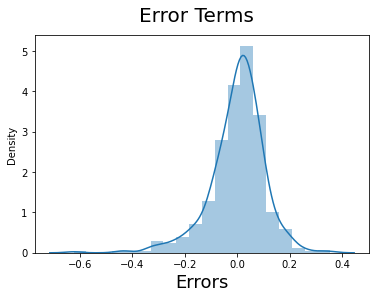

In [209]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

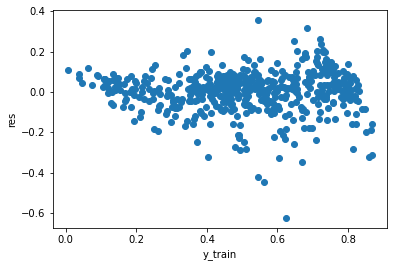

In [220]:
plt.scatter(y_train_pred,res)
plt.xlabel("y_train")
plt.ylabel("res")
plt.show()

## Making Predictions

In [199]:
num_vars = ['atemp', 'hum', 'temp', 'windspeed', 'cnt']

data_test[num_vars] = scaler.transform(data_test[num_vars])

#### Dividing into X_test and y_test

In [200]:
y_test = data_test.pop('cnt')
X_test = data_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          219 non-null    int64  
 1   holiday     219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   atemp       219 non-null    float64
 5   hum         219 non-null    float64
 6   windspeed   219 non-null    float64
 7   Spring      219 non-null    uint8  
 8   Summer      219 non-null    uint8  
 9   Winter      219 non-null    uint8  
 10  clear       219 non-null    uint8  
 11  mist        219 non-null    uint8  
dtypes: float64(4), int64(3), uint8(5)
memory usage: 14.8 KB


In [201]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [202]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

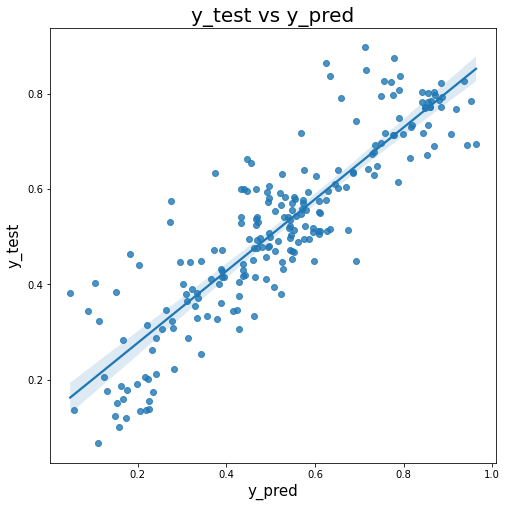

In [203]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(8, 8))
Plotting = sns.regplot(x=y_test, y=y_pred )
Plotting.set_xlabel("y_pred",fontsize=15)
Plotting.set_ylabel("y_test",fontsize=15)
Plotting.set_title("y_test vs y_pred", fontsize=20)
plt.show()

### R-Squared value Test

In [204]:
#evaluation
from sklearn.metrics import r2_score
r2=r2_score(y_true=y_test,y_pred=y_pred)
r2

0.7747956050422422

### Adjusted R-Squared value Test

In [205]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7616769024233437

In [206]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     198.6
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.24e-159
Time:                        20:33:53   Log-Likelihood:                 426.29
No. Observations:                 510   AIC:                            -832.6
Df Residuals:                     500   BIC:                            -790.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1966      0.034      5.793      0.0

### Final model equation

cnt = 0.1966 + (yr * 0.2392) + (holiday × -0.0655) + (workingday * 0.0146) + (temp * 0.4785) + (windspeed * -0.1814) + (Spring * -0.0718) + (Summer * 0.0430) + (Winter * 0.0696) + (mist * -0.0640)

### Summary

In [207]:
X_test_new.columns
#below features are the predicted variables

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed', 'Spring',
       'Summer', 'Winter', 'mist'],
      dtype='object')

-  Increase in temp will increasing bike sharing count by coefficient ratio of 0.4785 
-  Every Next year 0.2392 coefficient increment of bike demand.
-  similiary, increase windspeed & spring season is affecting the demand and drop in count by 0.1814 and 0.0718(-ve)
-  other variables, which is play a role of bike demand 